<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/22_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Навигация по уроку**

1. [Решение задач регрессии с помощью НС](https://colab.research.google.com/drive/1GbXbqPbC4A2NVJEj-5pOOySN3gyalBQN)
2. [Анализ резюме кандидатов](https://colab.research.google.com/drive/1L4pI4giYvWY3T4gfqTF5c_XFkN9k4Nfz)
3. Домашняя работа

**В домашней работе необходимо выполнить следующее задание:**

1. Используя предложенный [датасет](https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv) японских машин, обучите модель предсказывать цены на японские автомобили.
2. Создайте обучающую, тестовую и проверочную выборки.
3. Оцените качество работы созданной сети, определите средний процент ошибки на проверочной выборке.
4. В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse).
5. Выполнив задание, получите 3 балла.
6. Хотите 4 балла? Добейтесь ошибки менее 10%.
7. Хотите 5 баллов? Добейтесь ошибки менее 5%.


**Примечание**. Подробную информацию о датасете можно узнать на портале соревновани [kaggle.com](https://www.kaggle.com/datasets/doaaalsenani/used-cars-dataets/data).



In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from keras.layers import (
    BatchNormalization,
    Dense,
    Dropout,
    Embedding,
    Flatten,
    Input,
    concatenate,
)
from keras.models import Model
from keras.optimizers import Adam
from numpy._core.defchararray import decode
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [37]:
url = "https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv"
response = requests.get(url)
with open("japan_cars_dataset.csv", "wb") as f:
    f.write(response.content)

In [38]:
cars = pd.read_csv("japan_cars_dataset.csv", sep=",")
# cars.shape
cars.info()
cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
# ваше решение

In [39]:
# Load and preprocess data
def prepare_data(file_path):
    """
    Prepare car data for neural network training.

    Args:
        file_path (str): Path to the CSV file

    Returns:
        tuple: Contains:
            - categorical_encoded: One-hot encoded categorical features
            - numerical_scaled: Scaled numerical features
            - prices_scaled: Scaled target prices
            - numerical_scaler: Scaler for numerical features
            - price_scaler: Scaler for prices
    """
    # Read and clean data
    cars = pd.read_csv(file_path)
    cars = cars.dropna()

    # Split features into categorical and numerical
    categorical_columns = [
        "mark",
        "model",
        "transmission",
        "drive",
        "hand_drive",
        "fuel",
    ]
    categorical_encoded = []

    # numerical_columns = ["year", "mileage", "engine_capacity"]
    numerical_columns = ["car_age", "mileage_per_year"]
    cars["car_age"] = 2024 - cars["year"]  # Car age
    cars["mileage_per_year"] = cars["mileage"] / cars["car_age"]

    # Normalize price range
    price_scaler = StandardScaler()
    prices_scaled = price_scaler.fit_transform(cars[["price"]])

    # # Group rare categories
    # min_categories = 10
    # for col in categorical_columns:
    #     value_counts = cars[col].value_counts()
    #     rare_categories = value_counts[value_counts < min_categories].index
    #     cars[col] = cars[col].replace(rare_categories, "Other")

    categorical_features = cars[categorical_columns]
    encoder = OneHotEncoder()
    categorical_encoded = encoder.fit_transform(categorical_features)

    numerical_features = cars[numerical_columns]
    numerical_scaler = StandardScaler()
    numerical_scaled = numerical_scaler.fit_transform(numerical_features)

    return (
        categorical_encoded,
        numerical_scaled,
        prices_scaled,
        price_scaler,
    )


def decode_price(price, price_scaler):
    decoded_price = price_scaler.inverse_transform(prices)
    return decoded_price

In [40]:
# Create model
def create_model(categorical_shape, numerical_shape):
    # Categorical branch
    categorical_input = Input(shape=(categorical_shape,))
    x1 = Dense(64, activation="relu")(categorical_input)
    x1 = BatchNormalization()(x1)
    x1 = Dense(32, activation="relu")(x1)
    x1 = Dropout(0.2)(x1)

    # Numerical branch
    numerical_input = Input(shape=(numerical_shape,))
    x2 = Dense(32, activation="relu")(numerical_input)
    x2 = BatchNormalization()(x2)
    x2 = Dense(16, activation="relu")(x2)
    x2 = Dropout(0.2)(x2)

    # Combine
    combined = concatenate([x1, x2])
    x = Dense(128, activation="relu")(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1, activation="linear")(x)

    return Model(inputs=[categorical_input, numerical_input], outputs=x)


def split_data(dataset_parts, test_size=0.2):
    """
    Split data into training, validation and test sets.

    Args:
        dataset_parts (tuple): Tuple containing parts of dataset to split
        test_size (float): Size of test set as fraction of total dataset (default 0.3)

    Returns:
        tuple: Split datasets with same order as input
    """
    train_parts = []
    temp_parts = []
    val_parts = []
    test_parts = []

    for part in dataset_parts:
        train, temp = train_test_split(part, test_size=test_size, random_state=42)
        train_parts.append(train)
        temp_parts.append(temp)

    for temp in temp_parts:
        val, test = train_test_split(temp, test_size=0.5, random_state=42)
        val_parts.append(val)
        test_parts.append(test)

    result = []
    for train, val, test in zip(train_parts, val_parts, test_parts):
        result.extend([train, val, test])

    return tuple(result)

In [67]:
# # Training and evaluation
def train_and_evaluate(
    categorical_data,
    numerical_data,
    y_train,
    cat_val,
    num_val,
    y_val,
    epochs=None,
    batch_size=None,
):
    if epochs is None:
        epochs = 100
    if batch_size is None:
        batch_size = 32

    model = create_model(categorical_data.shape[1], numerical_data.shape[1])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="mse", metrics=["mae"])

    # Train model
    history = model.fit(
        [cat_train, num_train],
        y_train,
        validation_data=([cat_val, num_val], y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
    )

    # Evaluate model
    test_predictions = model.predict([cat_test, num_test])

    # Calculate error metrics
    mse = np.mean((y_test - test_predictions) ** 2)
    mae = np.mean(np.abs(y_test - test_predictions))
    mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

    print("\nTest Set Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Training MAE")
    plt.plot(history.history["val_mae"], label="Validation MAE")
    plt.title("Model MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, price_scaler, mape

In [69]:
# Prepare data
categorical_data, numerical_data, prices, price_scaler = prepare_data(
    "japan_cars_dataset.csv"
)

# print(categorical_data.shape)

# print(numerical_data.shape)
# print(numerical_data[0])

# print(prices.shape)
# print(prices[0])
# decodered_price = decode_price(prices[0][0], price_scaler)
# print(decodered_price)

In [70]:
split_datasets = split_data([categorical_data, numerical_data, prices], 0.1)

# Unpack the split datasets
cat_train, cat_val, cat_test = split_datasets[0:3]
num_train, num_val, num_test = split_datasets[3:6]
y_train, y_val, y_test = split_datasets[6:9]

print(f"Training set size: {len(y_train)}")
print(f"Validation set size: {len(y_val)}")
print(f"Test set size: {len(y_test)}")

Training set size: 2086
Validation set size: 116
Test set size: 116


Epoch 1/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.3290 - mae: 1.1824 - val_loss: 0.8980 - val_mae: 0.8041
Epoch 2/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5334 - mae: 0.9936 - val_loss: 0.9046 - val_mae: 0.8064
Epoch 3/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3324 - mae: 0.9262 - val_loss: 0.9180 - val_mae: 0.8067
Epoch 4/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2432 - mae: 0.8973 - val_loss: 0.9147 - val_mae: 0.8053
Epoch 5/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2351 - mae: 0.8867 - val_loss: 0.9119 - val_mae: 0.8078
Epoch 6/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1871 - mae: 0.8906 - val_loss: 0.8761 - val_mae: 0.7996
Epoch 7/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1134 - mae: 0.8586 - val_loss: 0.8521 - val_mae: 0.7965
Epoch 8/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1466 - mae: 0.8760 - val_loss: 0.8331 - val_mae: 0.7875
Epoch 9/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

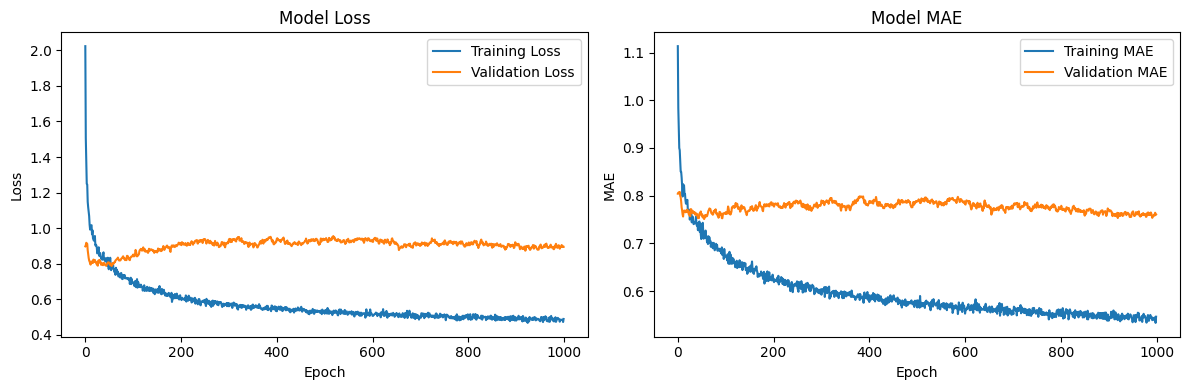

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step

Test Set Metrics:
Mean Squared Error: 1.0587
Mean Absolute Error: 0.8009
Mean Absolute Percentage Error: 218.00%


In [72]:
# Run training and evaluation
model, price_scaler, error_percentage = train_and_evaluate(
    cat_train, num_train, y_train, cat_val, num_val, y_val, epochs=100
)

In [51]:
# Предсказание на новых данных (контрольный образец)
pred_test = model.predict([cat_test, num_test])
pred = price_scaler.inverse_transform(pred_test)
real = price_scaler.inverse_transform(y_test)


mean_error = mean_absolute_error(pred_test, y_test)
print("Средняя абсолютная ошибка:", mean_error)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [73]:
for i in range(10):
    x = real[i, 0]
    y = pred[i, 0]
    print(
        "Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}".format(
            x,
            y,
            abs(x - y),
        )
    )

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Средняя абсолютная ошибка: 0.8008573798355546


In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(pred, real)  # Отрисовка точечного графика
# ax.set_xlim(0, 1)  # Ограничение оси по x
# ax.set_ylim(0, 1)  # Ограничение оси по x
ax.plot(plt.xlim(), plt.ylim(), "r")  # Отрисовка диагональной линии
plt.xlabel("Правильные значения")
plt.ylabel("Предсказания")
plt.grid()
plt.show()